In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics

In [107]:
# loading dataset
df = pd.read_csv('Churn_Modelling.csv')

In [108]:
# display multiple rows and columns in a dataset
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9939,9940,15808971,Lajoie,693,Spain,Female,57,9,0.00,2,1,1,135502.77,0
2403,2404,15756901,Ch'ang,641,France,Female,26,4,91547.84,2,0,1,28157.34,0
8272,8273,15705739,Toscani,753,Germany,Male,32,5,159904.79,1,1,0,148811.14,0
1411,1412,15693904,Chiang,685,Germany,Female,30,4,84958.60,2,0,1,194343.72,0
3874,3875,15624186,McGregor,813,Germany,Female,25,5,123616.43,1,0,1,132959.33,0


In [109]:
# checking the shape of the dataset
df.shape 

(10000, 14)

In [110]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Semua tipe data sudah sesuai, tidak perlu mengubah tipe data

In [111]:
# cek missing value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Tidak ada data kosong (null value) pada dataset

In [112]:
# check data duplicated
df.duplicated().sum()

0

Tidak data yang duplikat

In [113]:
# Dropping the unecessary columns - RowNumber, CustomerId, Surname
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [114]:
# Renaming the column 'Exited' to 'Churn
df.rename(columns={'Exited':'Churn'},inplace=True)

In [115]:
# statistics summary
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [116]:
df.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
- Semua tipe data pada dataset sudah sesuai, sedangkan untuk kolom 'exited' diganti dengan nama 'Churn' agar lebih informatif dan kolom RowNumber','CustomerId' dan 'Surname' dihapus karena tidak terlalu penting terhadap target. 

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
- Tidak terdapat missing value pada dataset

C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) <br>
- Dari analisis deskriptif yang telah dilakukan menunjukkan bahwa dari 10000 baris data, pada data kategorikal terdapat kolom 'Geography' dengan France sebagai frekuensi tertinggi sebanyak 5014 dan kolom 'Gender' dengan Male dengan frekuensi 5457. Sedangkan pada data numerikal terdapat anomali seperti kolom 'Age' dan 'NumOfProducts' dimana nilai max dengan Q3 cukup jauh (indikasi outlier)

# Univariate Analysis

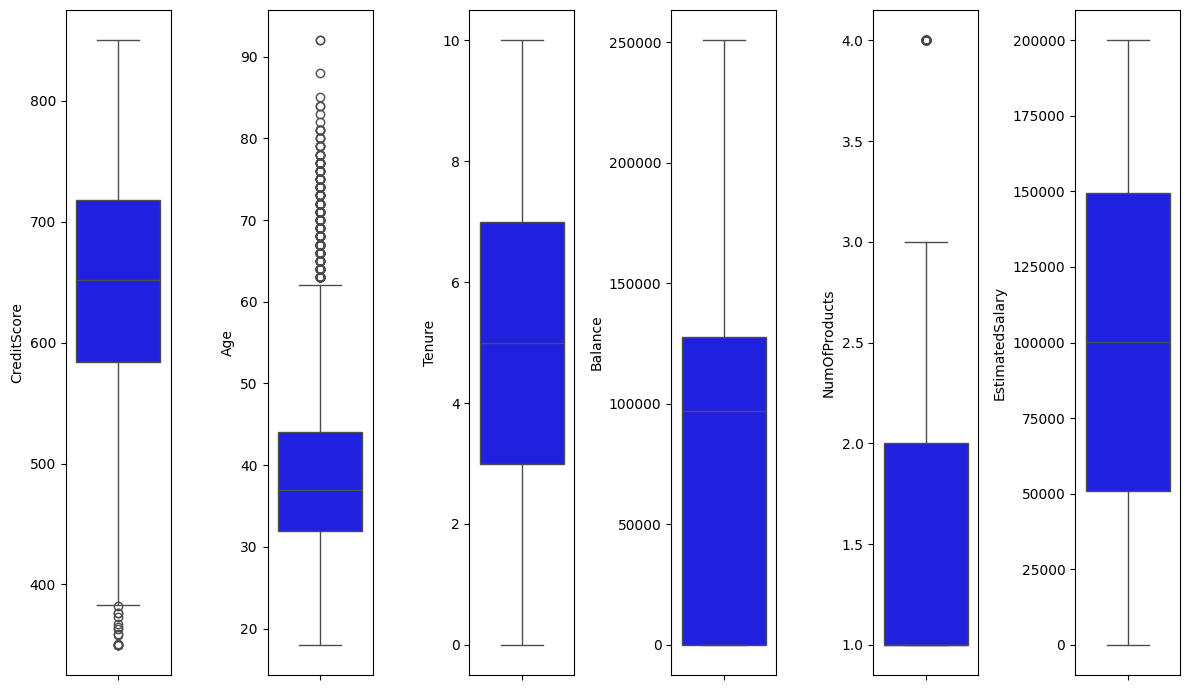

In [117]:
numericals = df[['CreditScore',	'Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]
features = numericals.columns  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(12,7))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=numericals[features[i]], color='blue', orient='v')
  plt.tight_layout()

plt.show()  # Untuk menampilkan plotnya

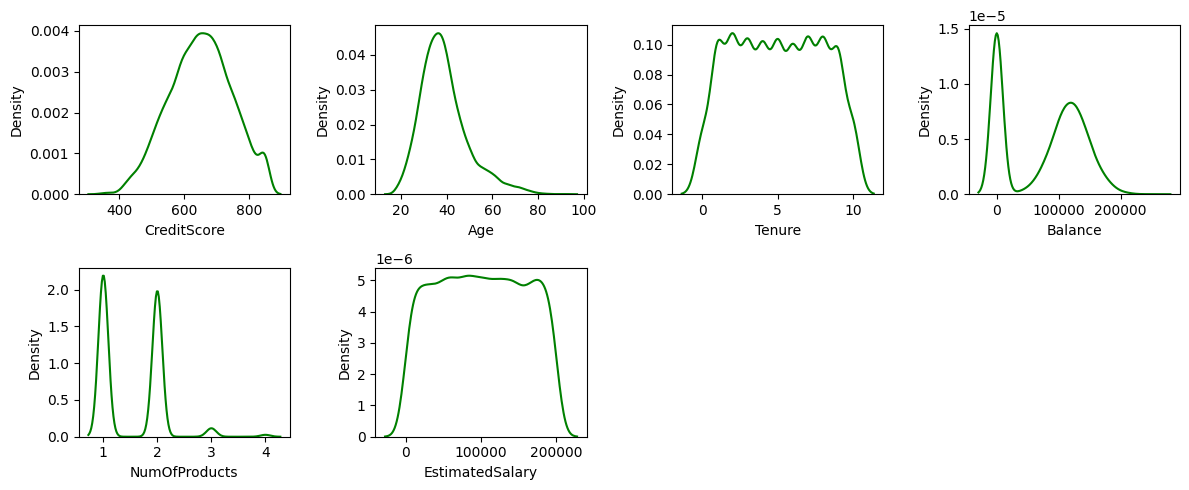

In [118]:
numericals = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]
features = numericals.columns  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(12,5))
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x = df[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

plt.show()  # Untuk menampilkan plotnya

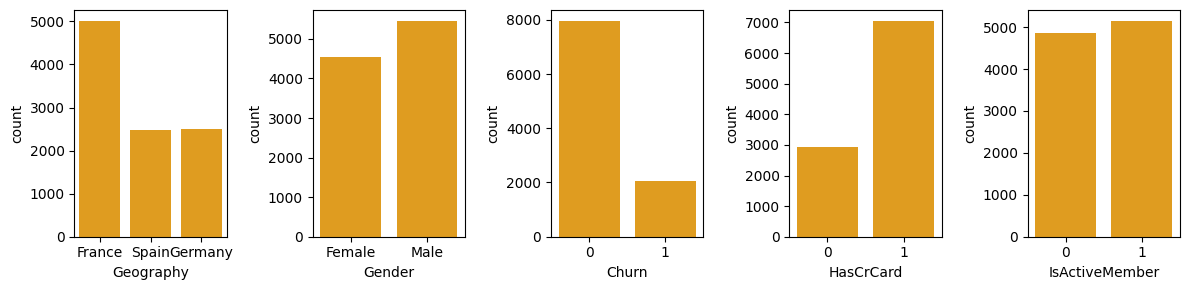

In [120]:
categorical = df[['Geography','Gender','Churn','HasCrCard','IsActiveMember']]
features = categorical.columns  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(12,3))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.countplot(x=df[features[i]], color='orange')
  plt.tight_layout()

**Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing**

* Terlihat pada boxplot chart bahwa pada kolom 'Age' dan kolom 'NumOfProducts' terdapat outlier.
* Dari kdeplot yang menunjukkan skewness dari data tersebut, dapat terlihat bahwa sebagian besar kolom 'Age' cenderung positively skew. Sedangkan untuk kolom 'Balance','HasCrCard','IsActiveMember, cenderung memiliki distribusi bimodal dan kolom 'NumOfProducts' cenderung memiliki distribusi multimodal.
* Dari kolom2 categorical yang ada dapat terlihat bahwa kolom  'Geography' didominasi oleh France, kolom 'Gender' didominasi oleh Male, Kolom 'Churn' lebih banyak yang tidak churn, dan kolom 'HasCrCard' didomiasi oleh nasabah yang memiliki kartu kredit. 
* Untuk next step yang harus di follow up saat data pre-processing ialah handling data outlier dan melakukan feature transformasi (e.g. normalisasi etc).

# Multivariate Analysis

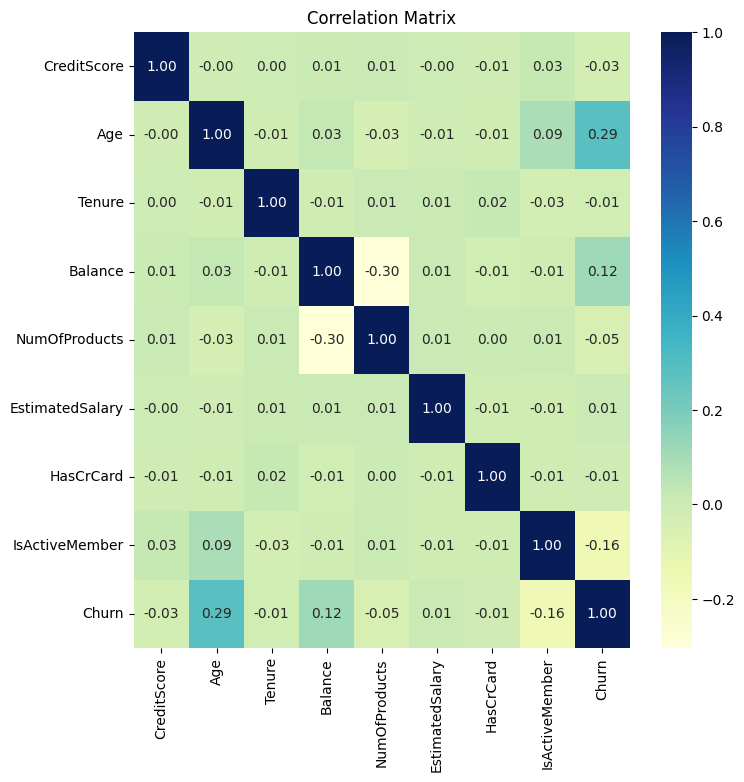

In [104]:
korelasi = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','HasCrCard','IsActiveMember','Churn']]
df = korelasi
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1500x1500 with 0 Axes>

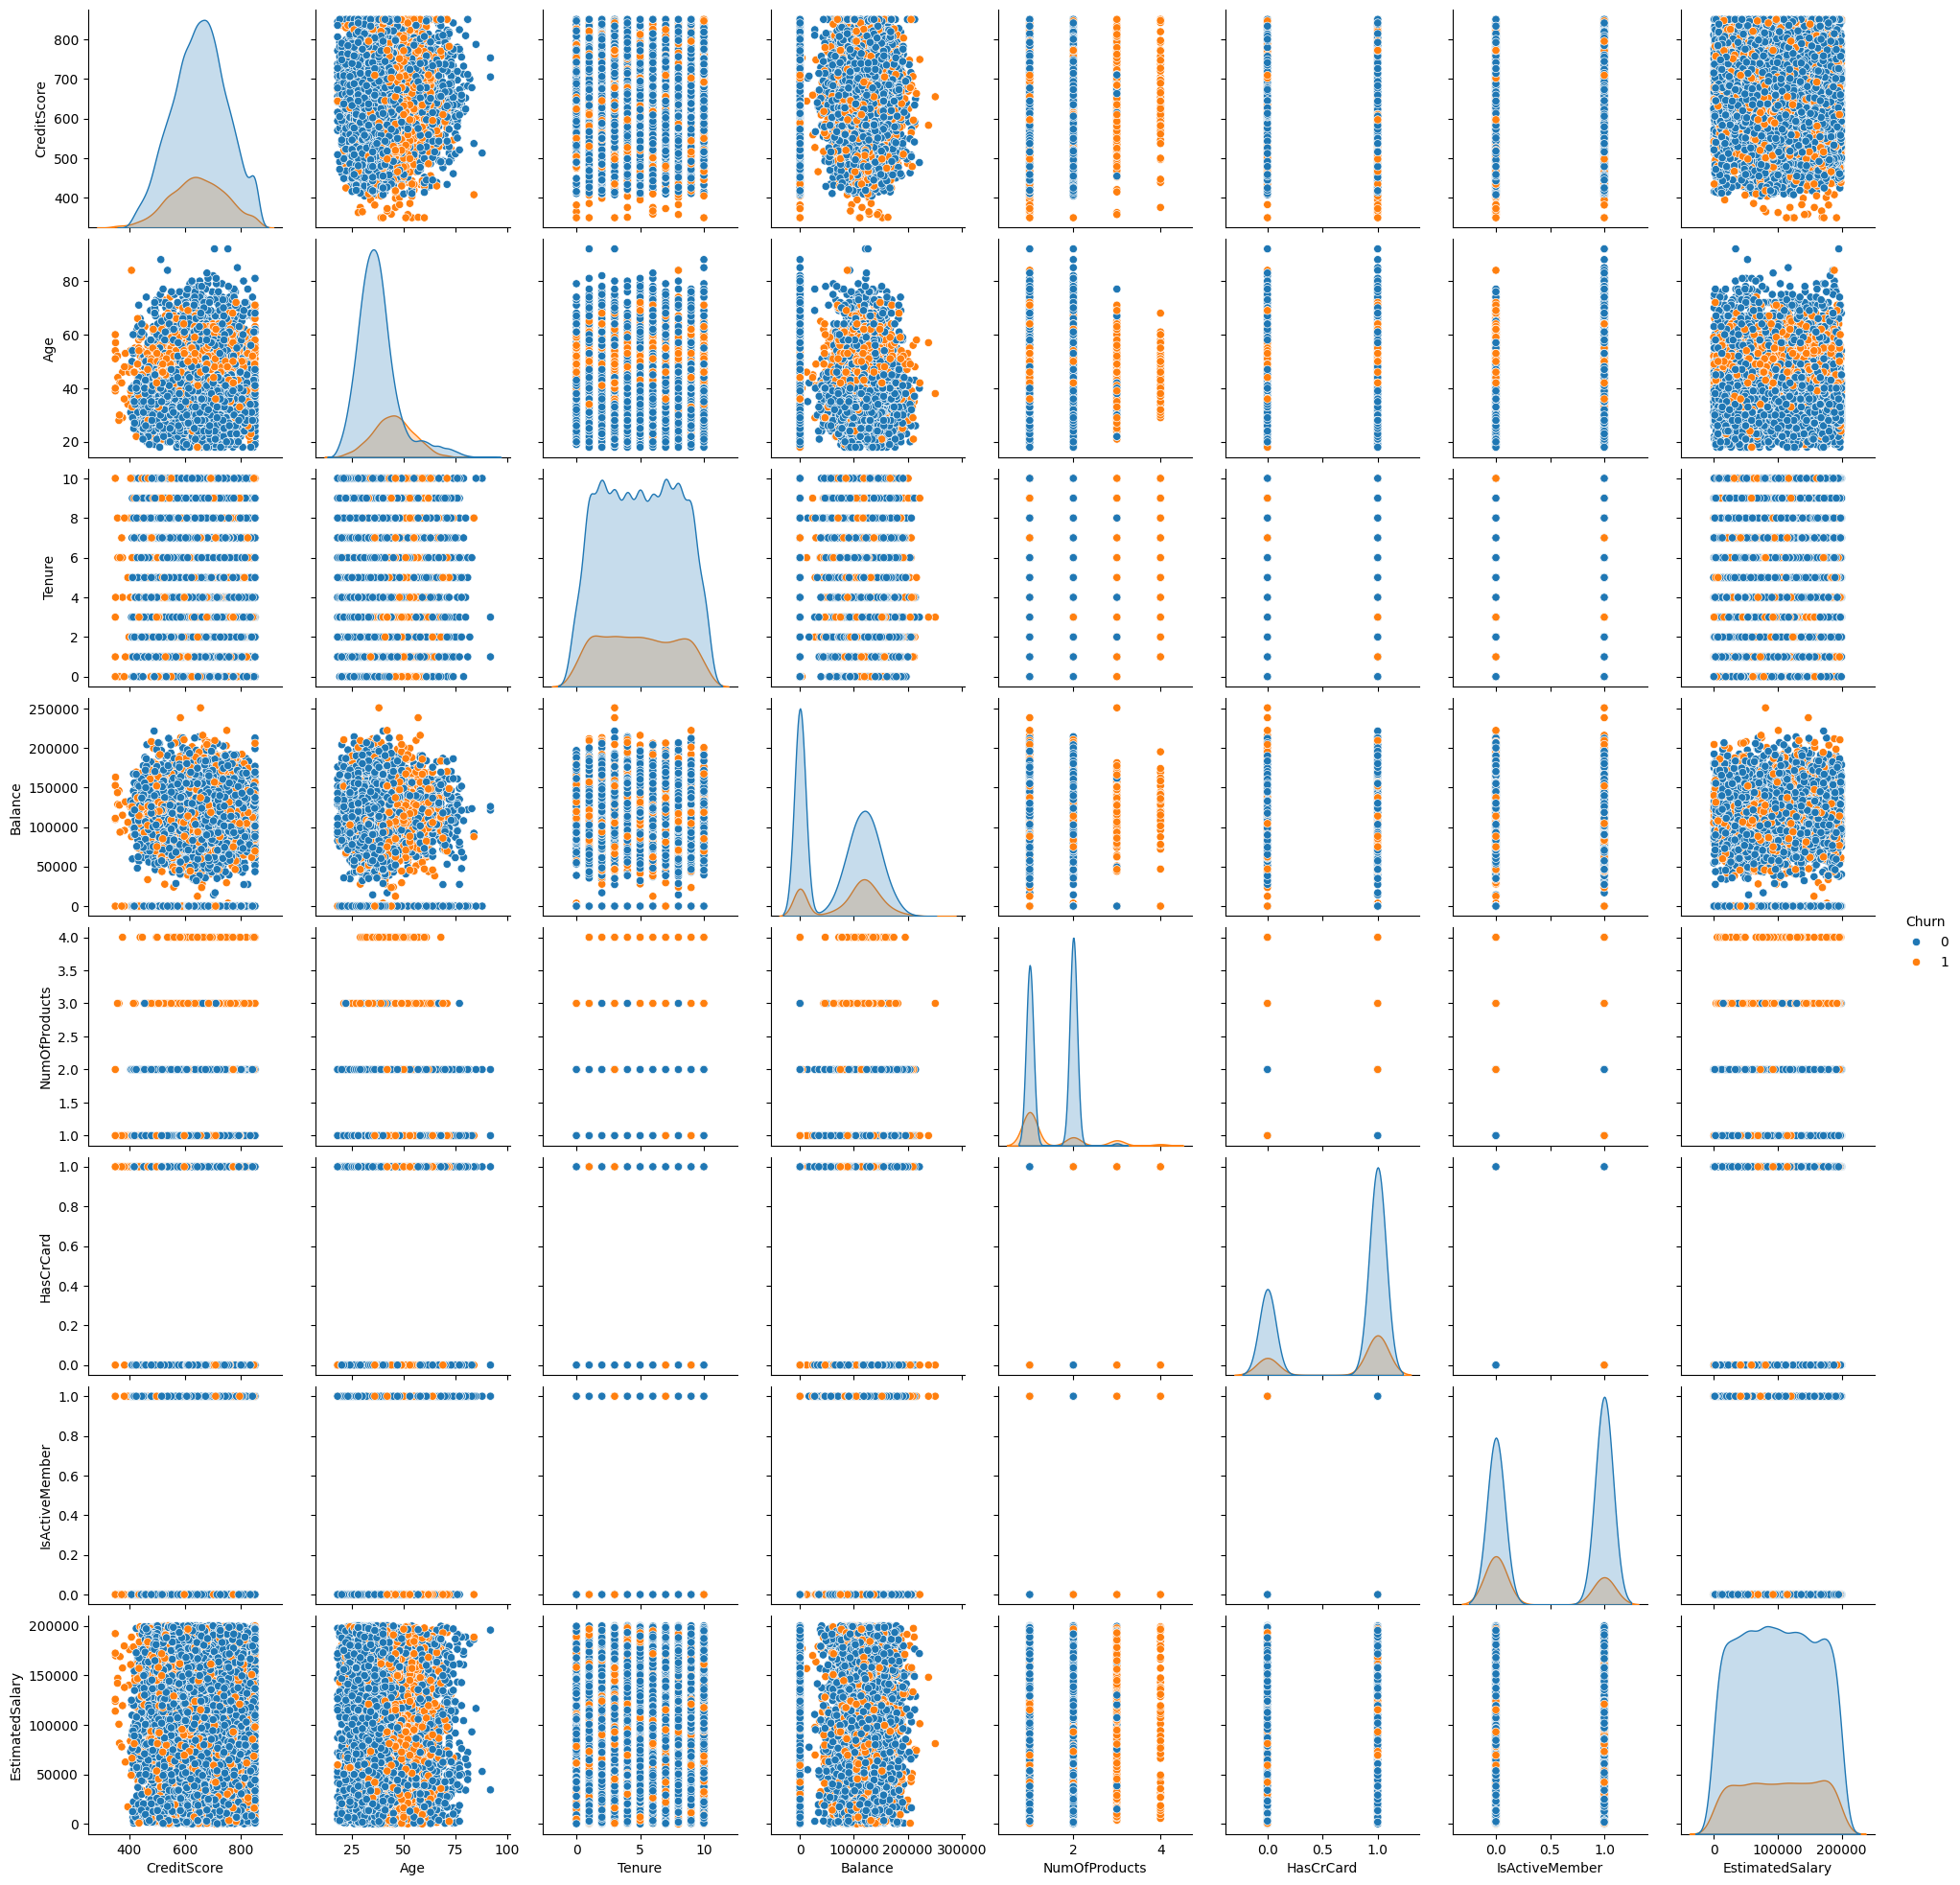

In [98]:
plt.figure(figsize=(15,15))
sns.pairplot(df, hue='Churn', diag_kind='kde')